In [1]:
# Install PySpark
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=e8918db5c435dcc7d1857fea98d0bf33672451dd0c975a5b5757a3258b29d01d
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
# Upload data
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


In [3]:
# Create a session on Spark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.sql.types import DoubleType

# Initialize Spark session
spark = SparkSession.builder.master("local[*]").appName("Lab1").getOrCreate()

In [4]:
# 1 Read the given CSV file
df = spark.read.csv('BostonHousing.csv', header=True, inferSchema=True)

# 2 Display the first few rows of the dataframe
df.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [5]:
# 3 Count number of observation in the dataset
df.count()

506

In [7]:
# 4. Show the Schema of your dataset
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [8]:
# 5. Drop the column "b" from your dataset
df = df.drop('zn')
df.show(5)

+-------+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [9]:
# 6. Round all of the numerical columns into two decimal place
from pyspark.sql import functions as f
df.select(*[f.round(c, 2).alias(c) for c in df.columns]) \
  .show()

+----+-----+----+----+----+-----+----+---+---+-------+------+-----+----+
|crim|indus|chas| nox|  rm|  age| dis|rad|tax|ptratio|     b|lstat|medv|
+----+-----+----+----+----+-----+----+---+---+-------+------+-----+----+
|0.01| 2.31|   0|0.54|6.58| 65.2|4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.03| 7.07|   0|0.47|6.42| 78.9|4.97|  2|242|   17.8| 396.9| 9.14|21.6|
|0.03| 7.07|   0|0.47|7.19| 61.1|4.97|  2|242|   17.8|392.83| 4.03|34.7|
|0.03| 2.18|   0|0.46| 7.0| 45.8|6.06|  3|222|   18.7|394.63| 2.94|33.4|
|0.07| 2.18|   0|0.46|7.15| 54.2|6.06|  3|222|   18.7| 396.9| 5.33|36.2|
|0.03| 2.18|   0|0.46|6.43| 58.7|6.06|  3|222|   18.7|394.12| 5.21|28.7|
|0.09| 7.87|   0|0.52|6.01| 66.6|5.56|  5|311|   15.2| 395.6|12.43|22.9|
|0.14| 7.87|   0|0.52|6.17| 96.1|5.95|  5|311|   15.2| 396.9|19.15|27.1|
|0.21| 7.87|   0|0.52|5.63|100.0|6.08|  5|311|   15.2|386.63|29.93|16.5|
|0.17| 7.87|   0|0.52| 6.0| 85.9|6.59|  5|311|   15.2|386.71| 17.1|18.9|
|0.22| 7.87|   0|0.52|6.38| 94.3|6.35|  5|311|   15

In [12]:
# 7. Create a new column (Age10)  with 10% increasing of 'age' column
df = df.withColumn("Age10", col("age") * 1.10)
df.select(*[f.round(c, 2).alias(c) for c in df.columns]) \
  .show()

+----+-----+----+----+----+-----+----+---+---+-------+------+-----+----+------+
|crim|indus|chas| nox|  rm|  age| dis|rad|tax|ptratio|     b|lstat|medv| Age10|
+----+-----+----+----+----+-----+----+---+---+-------+------+-----+----+------+
|0.01| 2.31|   0|0.54|6.58| 65.2|4.09|  1|296|   15.3| 396.9| 4.98|24.0| 71.72|
|0.03| 7.07|   0|0.47|6.42| 78.9|4.97|  2|242|   17.8| 396.9| 9.14|21.6| 86.79|
|0.03| 7.07|   0|0.47|7.19| 61.1|4.97|  2|242|   17.8|392.83| 4.03|34.7| 67.21|
|0.03| 2.18|   0|0.46| 7.0| 45.8|6.06|  3|222|   18.7|394.63| 2.94|33.4| 50.38|
|0.07| 2.18|   0|0.46|7.15| 54.2|6.06|  3|222|   18.7| 396.9| 5.33|36.2| 59.62|
|0.03| 2.18|   0|0.46|6.43| 58.7|6.06|  3|222|   18.7|394.12| 5.21|28.7| 64.57|
|0.09| 7.87|   0|0.52|6.01| 66.6|5.56|  5|311|   15.2| 395.6|12.43|22.9| 73.26|
|0.14| 7.87|   0|0.52|6.17| 96.1|5.95|  5|311|   15.2| 396.9|19.15|27.1|105.71|
|0.21| 7.87|   0|0.52|5.63|100.0|6.08|  5|311|   15.2|386.63|29.93|16.5| 110.0|
|0.17| 7.87|   0|0.52| 6.0| 85.9|6.59|  

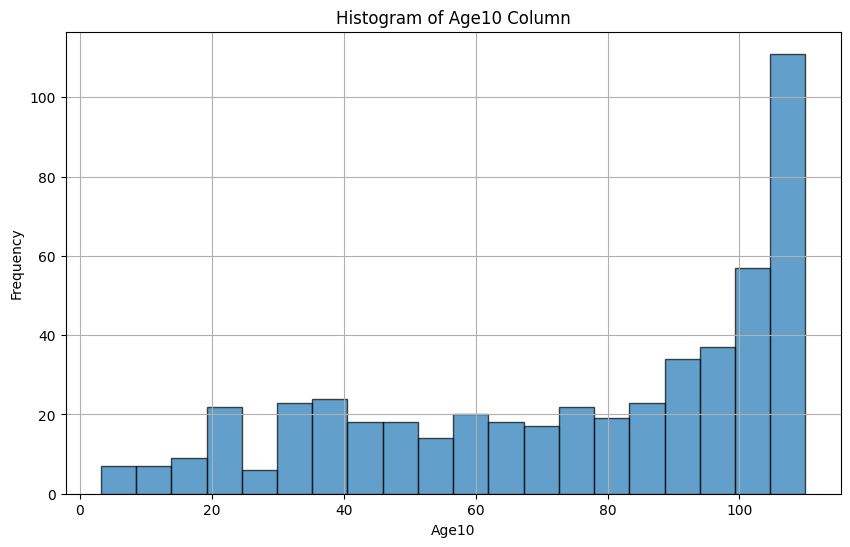

In [13]:
# 8. Plot histogram Age10 column on a 2D Plot
import matplotlib.pyplot as plt

# Collect the data for the Age10 column
age10_data = df.select("Age10").rdd.flatMap(lambda x: x).collect()

# Plot histogram of Age10 column
plt.figure(figsize=(10, 6))
plt.hist(age10_data, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Age10 Column')
plt.xlabel('Age10')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [17]:
# 9. Provide Summary Statistics of all columns (count, mean, stddev,min, max)
from pyspark.sql.functions import col

# Calculate summary statistics for all columns
summary_df = df.describe()
summary_df.show()

+-------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|             indus|              chas|                nox|                rm|               age|              dis|              rad|               tax|           ptratio|                 b|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|                506|               506|               506|              506|              506|               

In [18]:
# 9. Convert  Spark Dataframe to Pandas Dataframe
pandas_df = df.toPandas()

In [19]:
# 10. Show the last 5 rows of Pandas DataFrame
print(pandas_df.tail())

        crim  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

          b  lstat  medv   Age10  
501  391.99   9.67  22.4   76.01  
502  396.90   9.08  20.6   84.37  
503  396.90   5.64  23.9  100.10  
504  393.45   6.48  22.0   98.23  
505  396.90   7.88  11.9   88.88  
